# Plotting KAN Networks

KAN networks offer the advantage of being relatively small and highly interpretable. This notebook provides a utility for visualizing KAN networks, focusing particularly on their learned activations. In this notebook, we will demonstrate how to use this plotting utility.

In [9]:
import tkan.nn as kann
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import matplotlib.collections as collections
import numpy as np
import torch

%matplotlib inline

Currently, we only support Torch Sequential models or singular KAN layers for plotting. Let's start by defining a small network.

In [10]:
net = torch.nn.Sequential(
    kann.LegendreKan(in_features=2, out_features=2),
    kann.LegendreKan(in_features=2, out_features=3),
    kann.FixedNodesLagrangeKan(in_features=3, out_features=3),
    kann.LagrangeKan(in_features=3, out_features=1)
)

## Functional Interface

The quickest way to get a visualization is through the functional interface. By passing the network to the *plot_kan* function, it will generate and return a Matplotlib figure, which we can then display.

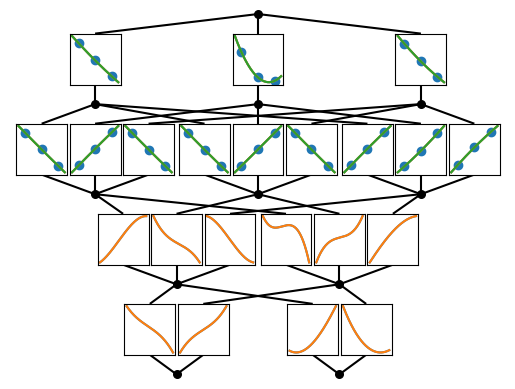

In [11]:
from tkan.plotting import plot_kan

plot_kan(net)
plt.show()


The *plot_kan* function will always draw to the current figure. Therefore, we can first create a new figure with the desired figsize for a larger image. We can also provide the *ax* argument to draw to a specific axis in a figure.

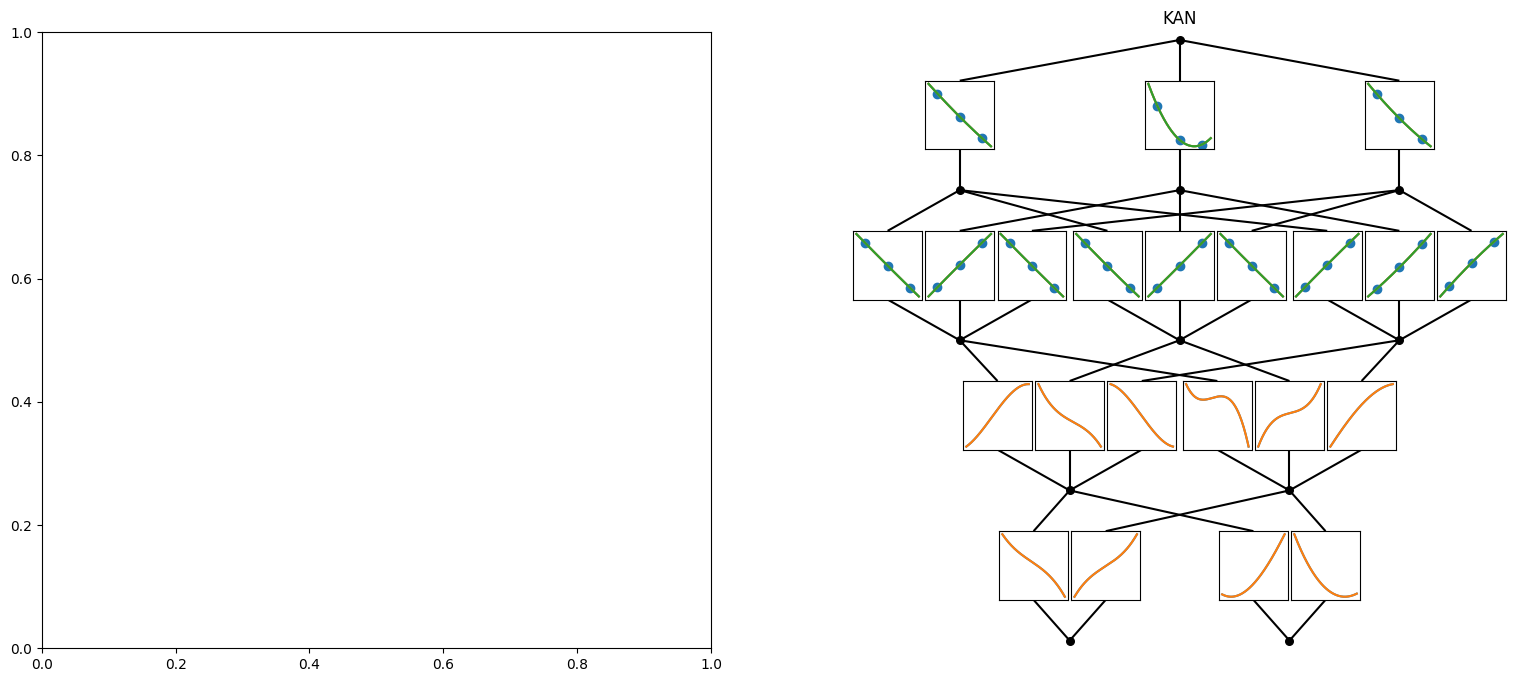

In [12]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(19, 8))
plot_kan(net, ax=ax2)
ax2.set_title("KAN")
plt.show()

The activations (specifically, the input ranges of the hidden activations) in a KAN depend on the input data supplied to the network. We can pass a sample batch to the *plot_kan* function to visualize the activations based on this input.

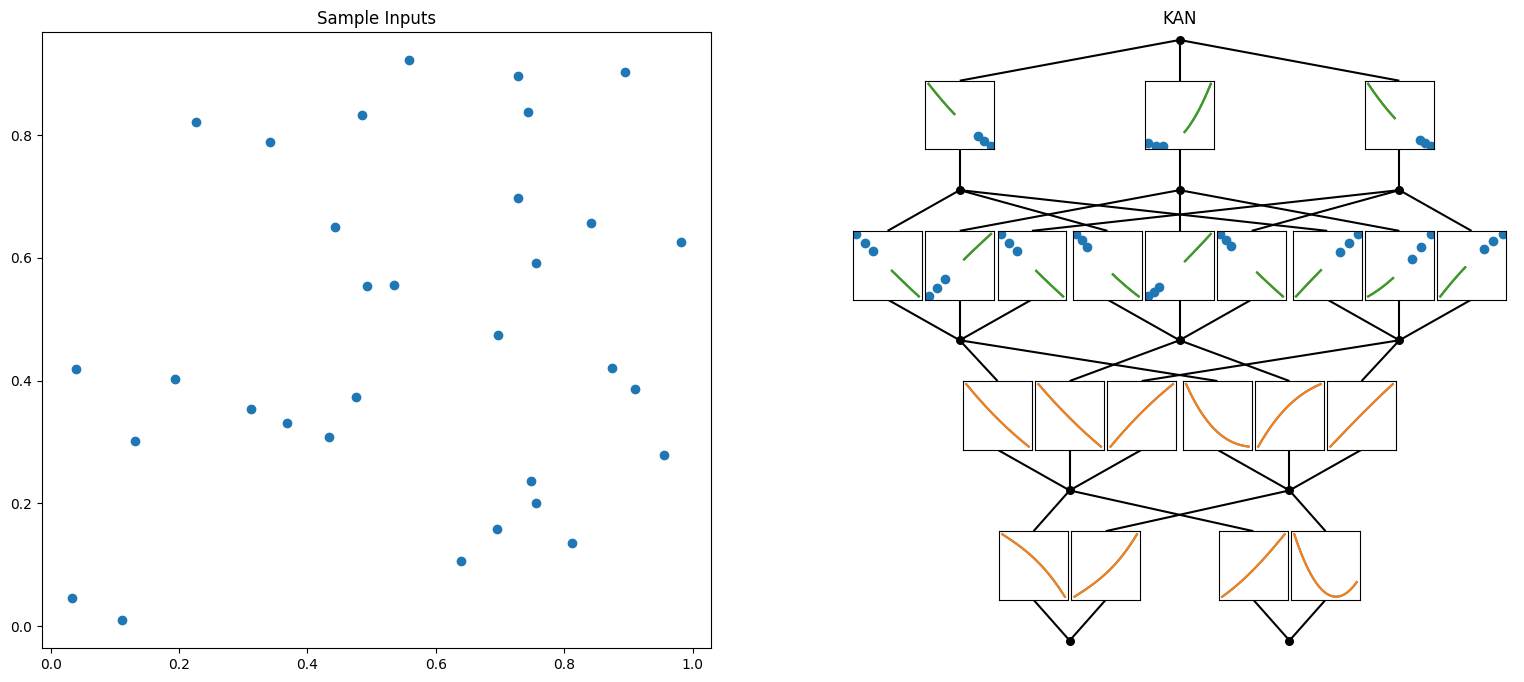

In [13]:
sample_inputs = torch.rand(size=(32, 2))
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(19, 8))
ax1.scatter(sample_inputs[:, 0].detach(), sample_inputs[:, 1].detach())
ax1.set_title("Sample Inputs")

plot_kan(net, sample_inputs=sample_inputs, ax=ax2)
ax2.set_title("KAN")

plt.show()

## Class Interface

The *plot_kan* function is a wrapper around an underlying Plotter Class **KanPlotter**. If you want it exposes a number of options to modify the visuals of the plot. You can modify the connection and node style and positioning.

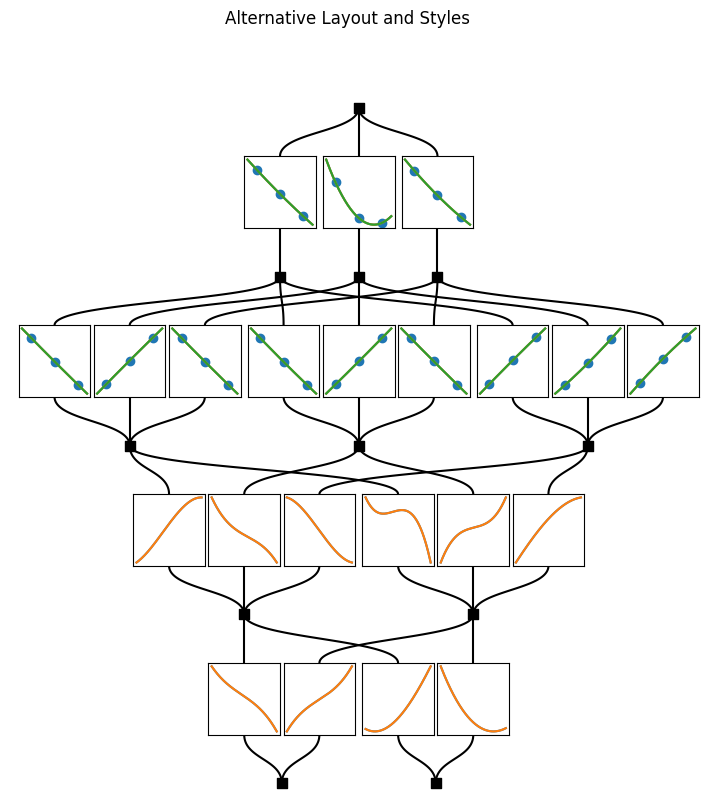

In [14]:
from tkan.plotting import KanPlotter


plotter = KanPlotter(
    node_positions='compact',   # Possible options: 'default', 'compact' and 'wide'
    node_type='squares',        # Possible options: 'dots' and 'squares
    connection_type='curved',   # Possible types: 'straight', 'curved' and 'split'
    node_size=3.0,              # Modify the size of drawn nodes

)
fig = plt.figure(figsize=(9, 9))
plotter(net)
fig.suptitle("Alternative Layout and Styles")
plt.show()

We can further customize the plotting by implementing our own functions for drawing connections and nodes and pass them to the *node_type* and *connection_type* arguments.

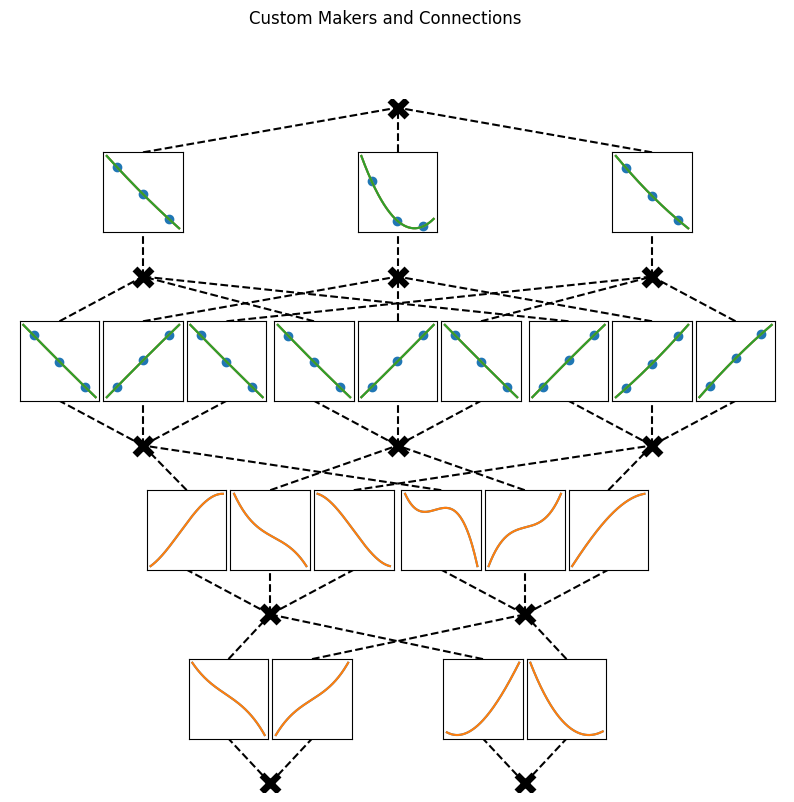

In [15]:
import matplotlib.transforms as transforms

def dashed_connection(
    start:tuple[float, float],     
    end:tuple[float, float],
    ax:plt.Axes,
    transform:transforms.Transform
) -> None:
    # Start and end points of the line are given relative to the position of the layer in the plot.
    # We need to use the given transform to to convert those to the correct coordinate space
    # Most matplotlib functions provide the transform argument to do so
    ax.plot([start[0], end[0]], [start[1], end[1]], color='black', linestyle='--', transform=transform)

def cross_nodes(
    x:np.ndarray,
    y:np.ndarray,
    size:float,         # Size is a relative scale value
    ax:plt.Axes,
    transform:transforms.Transform
) -> None:
    ax.scatter(
        x, y, 
        color='black', 
        marker='x', 
        s=size*50,
        linewidths=5,
        transform=transform
    ) 


plotter = KanPlotter(
    connection_type=dashed_connection,   
    node_type=cross_nodes,               
    node_size=3.0,                       # Modify the size of drawn nodes

)
fig = plt.figure(figsize=(10, 9))
plotter(net)
fig.suptitle("Custom Makers and Connections")
plt.show()